In [1]:
import numpy as np
import  matplotlib.pyplot as plt
from sklearn.metrics import r2_score
np.random.seed(424)

In [2]:
x = np.linspace(0, 20)
y = -1*x + 2

In [3]:
y = y.reshape(len(y), 1)
X = np.c_[np.ones(x.shape[0]).reshape(x.shape[0]), x]
theta = np.random.rand(X.shape[1], 1)

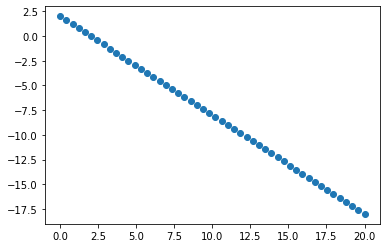

In [4]:
plt.scatter(x,y)

In [5]:
def compute_hypothesis(theta, x):
    return x @ theta

def compute_cost(theta, x, y):
    m = len(y)
    y_predict = compute_hypothesis(theta, x)
    return (1 / 2*m) * np.sum(np.square(y_predict - y))

def compute_gradient(theta, x, y):
    m = len(y)
    y_predict = compute_hypothesis(theta, x)
    return (1 / m) * (x.T @ (y_predict - y))

def plots(theta, X, x, y, theta_history, cost_history, hypothesis_history):
    plt.title("All Possible Lines")
    for i in range(len(hypothesis_history)):
        plt.plot(x, hypothesis_history[i], alpha=0.2)
        
    fig, axs = plt.subplots(2, 2, figsize=(12, 12))
    axs[0,0].title.set_text("Best Fit Line")
    axs[0,0].plot(x, compute_hypothesis(theta, X), c='r')
    axs[0,0].scatter(x, y)

    axs[0,1].set_xlabel("Iterations")
    axs[0,1].set_ylabel("Cost Function")
    axs[0,1].plot(cost_history, marker='v', linestyle="dashed")

    axs[1,0].set_xlabel("Weight 0")
    axs[1,0].set_ylabel("Cost")
    axs[1,0].plot(np.array(theta_history)[:, 0] , cost_history[:] , marker="v", linestyle="dashed")


    axs[1,1].set_xlabel("Weight 1")
    axs[1,1].set_ylabel("Cost")
    axs[1,1].plot(np.array(theta_history)[:, 1] , cost_history[:] , marker="v", linestyle="dashed")

------

## AdaGrad:

In [28]:
def adagrad(x, y, theta=np.random.rand(X.shape[1], 1), 
            learning_rate=0.001, epsilon=0.0001, max_iterations=1000, 
            batch_size=x.shape[0]):
    
    e = 0.001
    v = 0
    cost_history = []
    theta_history = []
    hypothesis_history = []
    gradient = compute_gradient(theta, x, y)
    counter = 0
    no_of_batches = x.shape[0] // batch_size
    index = [*range(0, x.shape[0] + 1, batch_size)]
    
    while counter < max_iterations and abs(np.sum(gradient)) >= epsilon:
        for i in range(no_of_batches):
            x_ith_batch =  x[index[i] : index[i+1]] 
            y_ith_batch =  y[index[i] : index[i+1]]
            
            gradient = compute_gradient(theta, x_ith_batch, y_ith_batch)
            v += gradient ** 2 
            theta -= (learning_rate / (v ** 0.5) + e) * gradient

            theta_history.append([theta[0, 0], theta[1, 0]])
            cost_history.append(compute_cost(theta, x_ith_batch, y_ith_batch))
            hypothesis_history.append(compute_hypothesis(theta, x_ith_batch))
            counter += 1
    
    return theta, theta_history, cost_history, counter, hypothesis_history

In [29]:
theta1, theta_history1, cost_history1, counter1, hypothesis_history1 = adagrad(X, y)

In [30]:
y_pred1 = compute_hypothesis(theta1, X)

In [31]:
r2_score(y, y_pred1)

0.9941805312081441

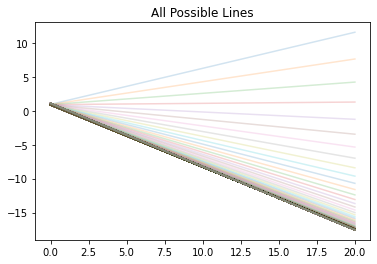

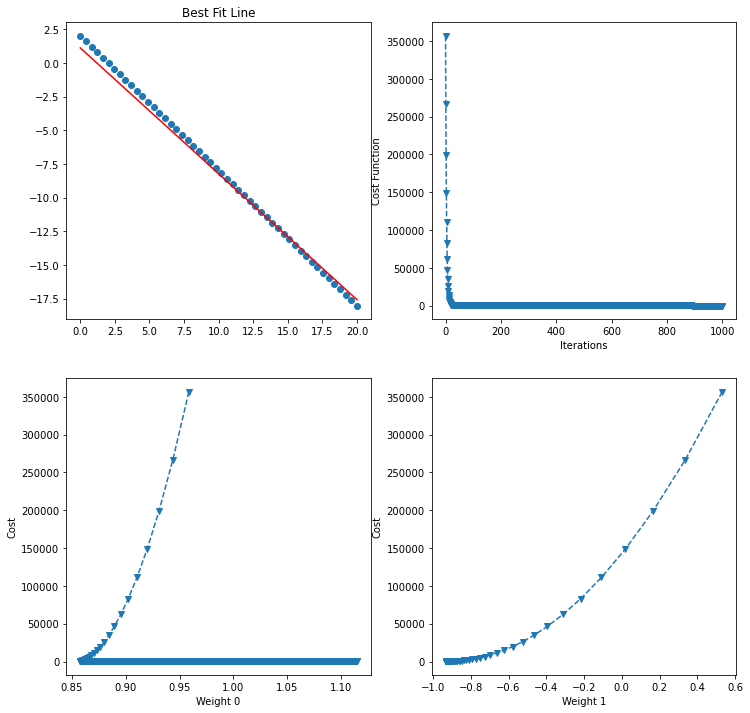

In [32]:
plots(theta1, X, x, y, theta_history1, cost_history1, hypothesis_history1)

---------------

### RMSProp:

In [11]:
def RMSProp(x, y, theta=np.random.rand(X.shape[1], 1), 
            learning_rate=0.001, epsilon=0.001, max_iterations=1000, beta=0.9,
            batch_size=x.shape[0]):
    
    e = 0.0001
    v = 0
    cost_history = []
    theta_history = []
    hypothesis_history = []
    gradient = compute_gradient(theta, x, y)
    counter = 0
    no_of_batches = x.shape[0] // batch_size
    index = [*range(0, x.shape[0] + 1, batch_size)]
    
    while counter < max_iterations and abs(np.sum(gradient)) >= epsilon:
        for i in range(no_of_batches):
            x_ith_batch =  x[index[i] : index[i+1]] 
            y_ith_batch =  y[index[i] : index[i+1]]
            
            gradient = compute_gradient(theta, x_ith_batch, y_ith_batch)
            v = beta * v + (1 - beta) * gradient ** 2 
            theta -= (learning_rate / (v ** 0.5) + e) * gradient

            theta_history.append([theta[0, 0], theta[1, 0]])
            cost_history.append(compute_cost(theta, x_ith_batch, y_ith_batch))
            hypothesis_history.append(compute_hypothesis(theta, x_ith_batch))
            counter += 1
    
    return theta, theta_history, cost_history, counter, hypothesis_history

In [12]:
theta2, theta_history2, cost_history2, counter2, hypothesis_history2 = RMSProp(X, y, beta=0.8)

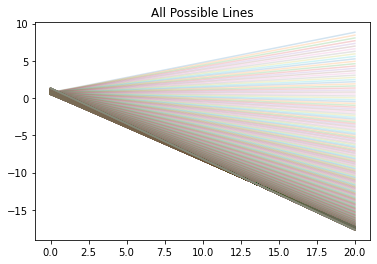

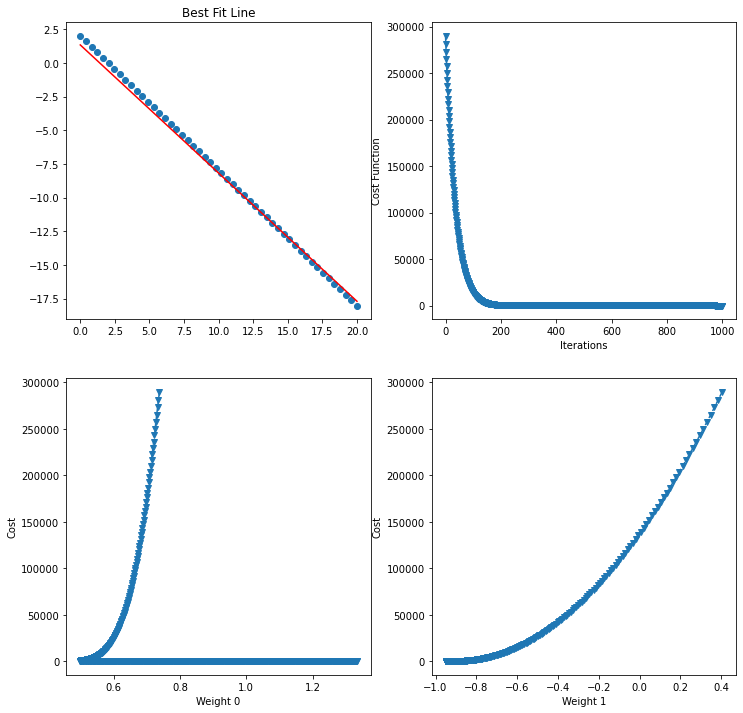

In [13]:
plots(theta2, X, x, y, theta_history2, cost_history2, hypothesis_history2)

In [14]:
y_pred2 = compute_hypothesis(theta2, X)
r2_score(y, y_pred2)

0.9967078037703034

-----

### Adam Oprimizer:

In [15]:
def adam(x, y, theta=np.random.rand(X.shape[1], 1), 
        learning_rate=0.001, epsilon=0.001, max_iterations=1000, beta1=0.9, beta2=0.9,
        batch_size=x.shape[0]):
    
    e = 0.0001
    v = 0
    m = 0
    cost_history = []
    theta_history = []
    hypothesis_history = []
    gradient = compute_gradient(theta, x, y)
    counter = 1
    no_of_batches = x.shape[0] // batch_size
    index = [*range(0, x.shape[0] + 1, batch_size)]
    
    while counter < max_iterations and abs(np.sum(gradient)) >= epsilon:
        counter += 1
        for i in range(no_of_batches):
            x_ith_batch =  x[index[i] : index[i+1]] 
            y_ith_batch =  y[index[i] : index[i+1]]
            
            gradient = compute_gradient(theta, x_ith_batch, y_ith_batch)
            m = beta1 * m + (1 - beta1) * gradient
            v = beta2 * v + (1 - beta2) * gradient ** 2 
            
            m /= (1 - beta1 ** (counter))
            v /= (1 - beta2 ** (counter))
            
            theta -= (learning_rate / (v ** 0.5) + e) * m

            theta_history.append([theta[0, 0], theta[1, 0]])
            cost_history.append(compute_cost(theta, x_ith_batch, y_ith_batch))
            hypothesis_history.append(compute_hypothesis(theta, x_ith_batch))
    
    return theta, theta_history, cost_history, counter, hypothesis_history

In [16]:
theta3, theta_history3, cost_history3, counter3, hypothesis_history3 = adam(X, y, beta1=0.9, beta2=0.9)

In [17]:
theta3

array([[ 1.34964763],
       [-0.95168915]])

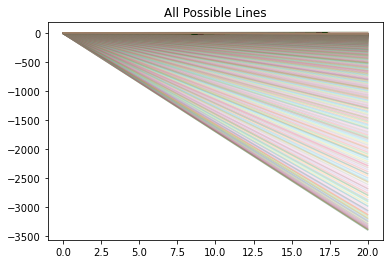

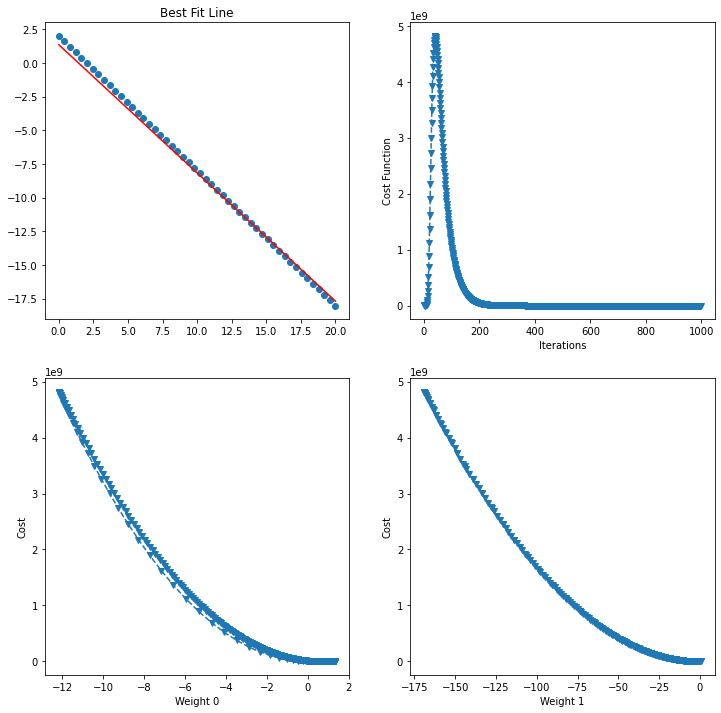

In [18]:
plots(theta3, X, x, y, theta_history3, cost_history3, hypothesis_history3)

In [19]:
y_pred3 = compute_hypothesis(theta3, X)
r2_score(y, y_pred3)

0.9968598529238364